In [1]:
import torch
from torch.utils.data import DataLoader
from scipy.stats import pearsonr
from pprint import pprint
import matplotlib.pyplot as plt

from EIANN import Network
import EIANN.utils as ut
import EIANN.plot as ep

ep.update_plot_defaults()

In [2]:
input_size = 21
dataset = torch.eye(input_size)
target = torch.eye(dataset.shape[0])

data_seed = 0
data_generator = torch.Generator()
sample_indexes = torch.arange(len(dataset))
dataloader = DataLoader(list(zip(sample_indexes, dataset, target)), shuffle=True, generator=data_generator)

epochs=30
seed=42

### Gjorgjieva learning rule

In [3]:
network_config = ut.read_from_yaml('../optimize/data/20220902_EIANN_1_hidden_Gjorgieva_Hebb_config_A.yaml')
pprint(network_config)

layer_config = network_config['layer_config']
projection_config = network_config['projection_config']
training_kwargs = network_config['training_kwargs']

network = Network(layer_config, projection_config, seed=seed, **training_kwargs)

{'layer_config': {'H1': {'E': {'activation': 'relu', 'size': 7},
                         'FBI': {'activation': 'relu', 'size': 7}},
                  'Input': {'E': {'size': 21}},
                  'Output': {'E': {'activation': 'relu', 'size': 21},
                             'FBI': {'activation': 'relu', 'size': 7}}},
 'projection_config': {'H1': {'E': {'H1': {'FBI': {'direction': 'R',
                                                   'learning_rule': 'GjorgievaHebb',
                                                   'learning_rule_kwargs': {'learning_rate': 0.11205994529904711,
                                                                            'sign': -1},
                                                   'weight_bounds': (None, 0),
                                                   'weight_constraint': 'normalize_weight',
                                                   'weight_constraint_kwargs': {'scale': 1.301412672000941},
                                       

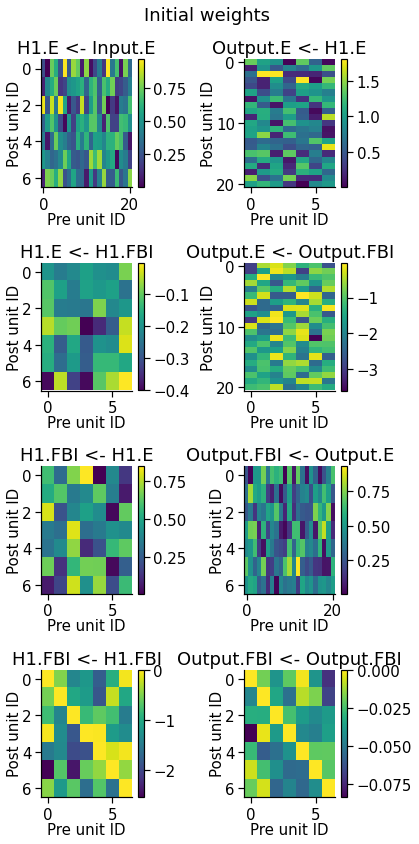

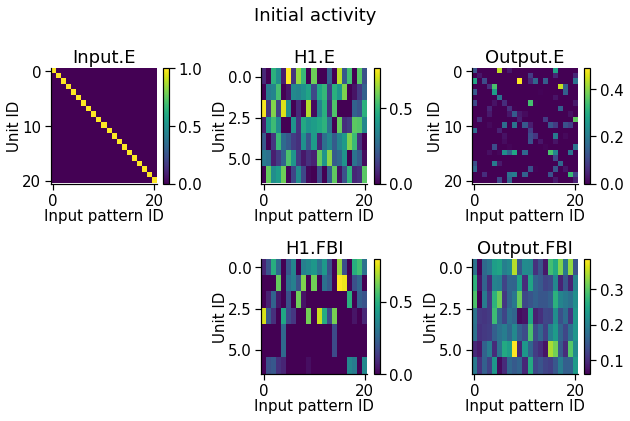

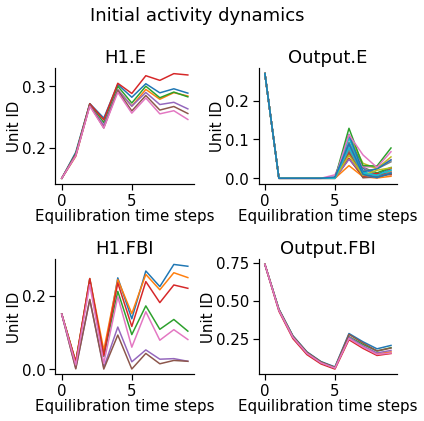

Initial population biases:
H1 E Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0.])
H1 FBI Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0.])
Output E Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Output FBI Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0.])


100%|██████████| 30/30 [00:01<00:00, 21.18it/s]
/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/utils.py:229: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/utils.py:237: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


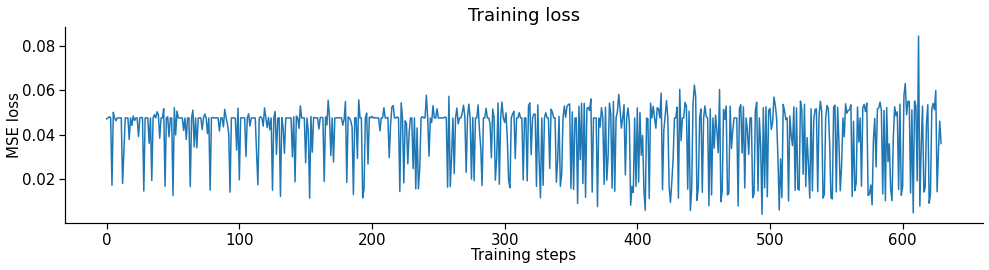

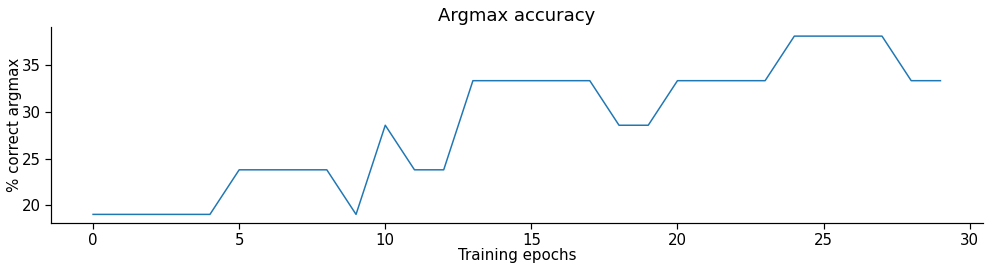

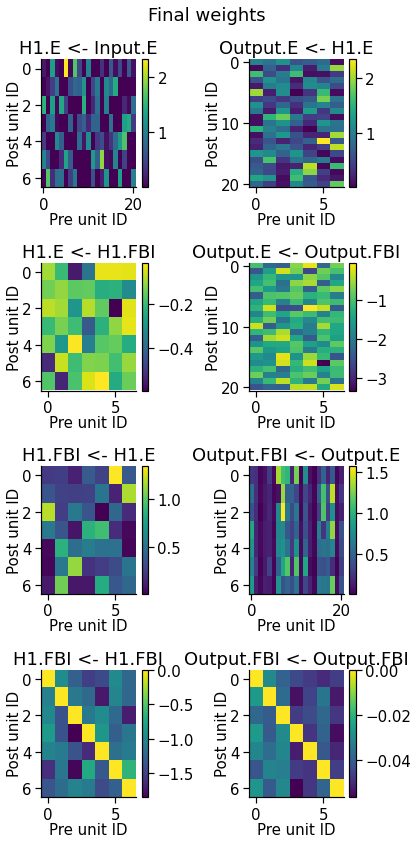

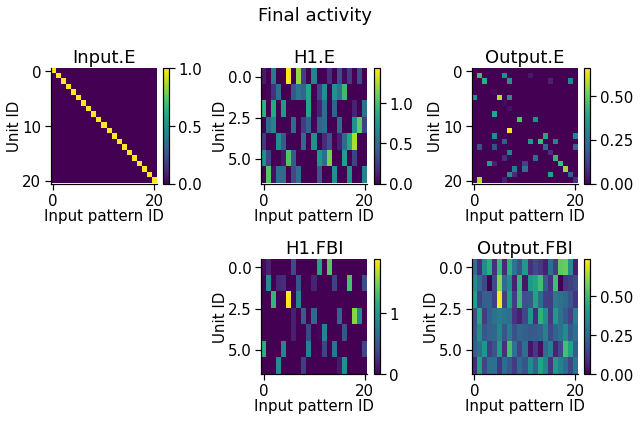

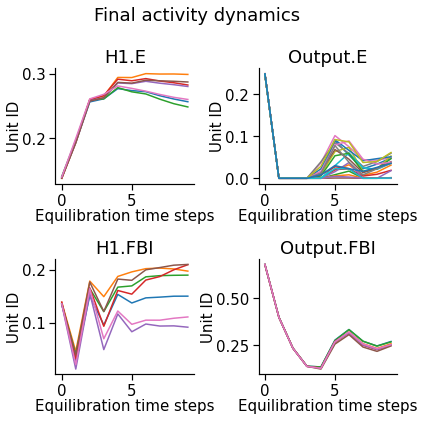

Final population biases:
H1 E Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0.])
H1 FBI Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0.])
Output E Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Output FBI Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0.])


In [4]:
data_generator.manual_seed(data_seed)
ut.test_EIANN_config(network, dataloader, epochs, supervised=False)

Pearson correlation: r=0.07287683413731358, r^2=0.005311032953877514, p=0.38037324441980164


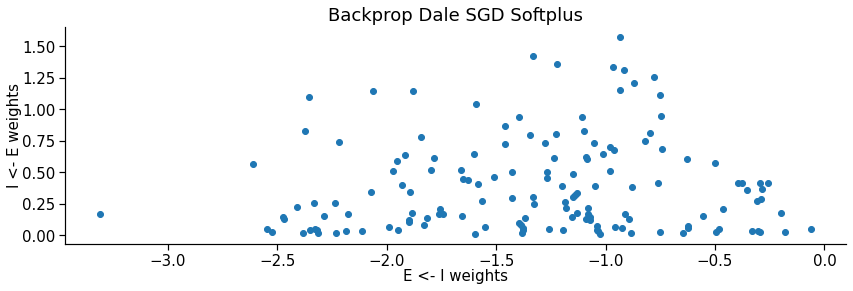

In [5]:
plt.figure()
E_I = network.Output.E.Output.FBI.weight.detach().numpy().flatten()
I_E = network.Output.FBI.Output.E.weight.detach().numpy().T.flatten()
plt.scatter(E_I, I_E)
plt.xlabel('E <- I weights')
plt.ylabel('I <- E weights')
plt.title('Backprop Dale SGD Softplus')
r, p = pearsonr(E_I, I_E)
print('Pearson correlation: r={}, r^2={}, p={}'.format(r,r**2,p))

- Export the weights along the trajectory for both models
- combine
- PCA
- interpolate (+- 10%)
- create set of weights
- probe loss of both networks
    - convert BP net to ReLU before computing loss
- plot 2D loss landscape as 3D heatmap (including 2 actual trajectories, plot separately)

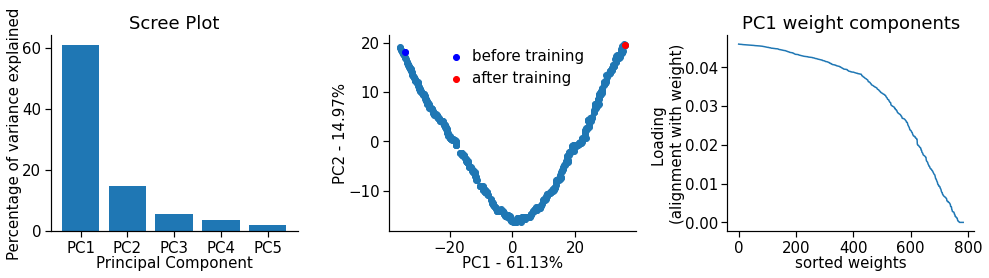

In [6]:
ep.plot_weight_history_PCs(network)

  0%|          | 0/400 [00:00<?, ?it/s]/Users/ag1880/opt/anaconda3/lib/python3.8/site-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([1, 21])) that is different to the input size (torch.Size([21])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|██████████| 400/400 [00:12<00:00, 31.74it/s]


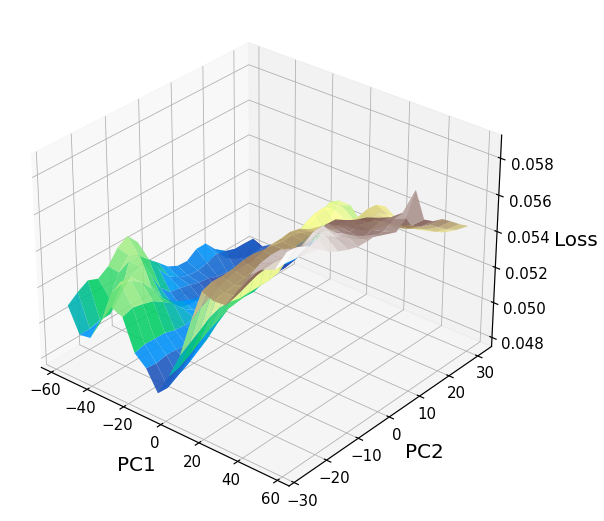

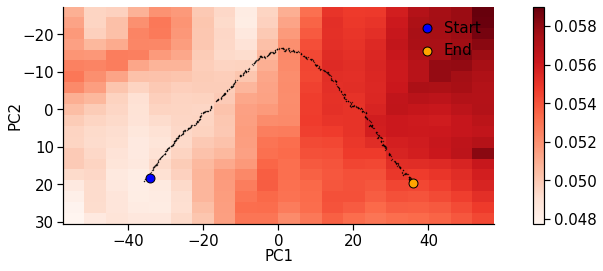

In [7]:
ds = [x for x in zip(dataset,target)]
test_dataloader = DataLoader(ds, batch_size=1)

ep.plot_loss_landscape(network, test_dataloader, num_points=20)

### Backprop (softplus; SGD)

{'layer_config': {'H1': {'E': {'activation': 'softplus',
                               'activation_kwargs': {'beta': 99.78563100135408},
                               'size': 7},
                         'FBI': {'activation': 'softplus',
                                 'activation_kwargs': {'beta': 99.78563100135408},
                                 'size': 7}},
                  'Input': {'E': {'size': 21}},
                  'Output': {'E': {'activation': 'softplus',
                                   'activation_kwargs': {'beta': 99.78563100135408},
                                   'size': 21},
                             'FBI': {'activation': 'softplus',
                                     'activation_kwargs': {'beta': 99.78563100135408},
                                     'size': 7}}},
 'projection_config': {'H1': {'E': {'H1': {'FBI': {'direction': 'R',
                                                   'learning_rule': 'Backprop',
                                       

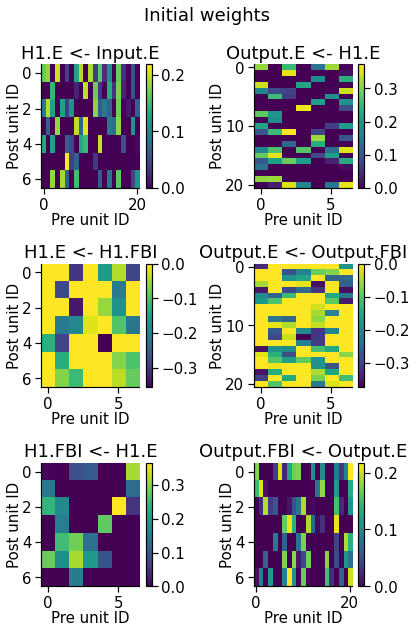

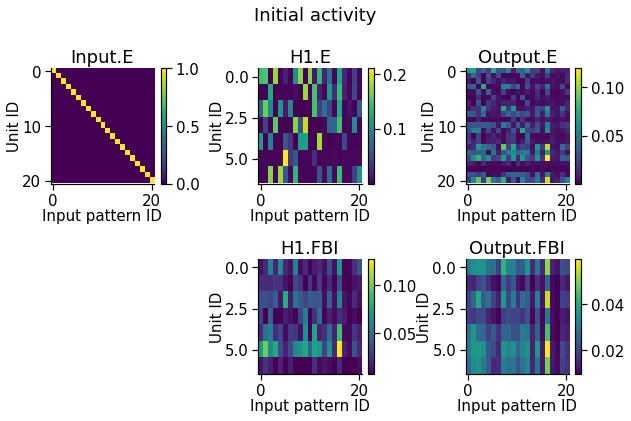

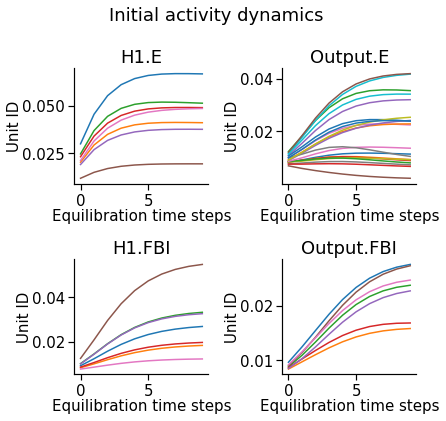

Initial population biases:
H1 E Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0.])
H1 FBI Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0.])
Output E Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Output FBI Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0.])


100%|██████████| 30/30 [00:01<00:00, 22.37it/s]
/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/utils.py:229: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/utils.py:237: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


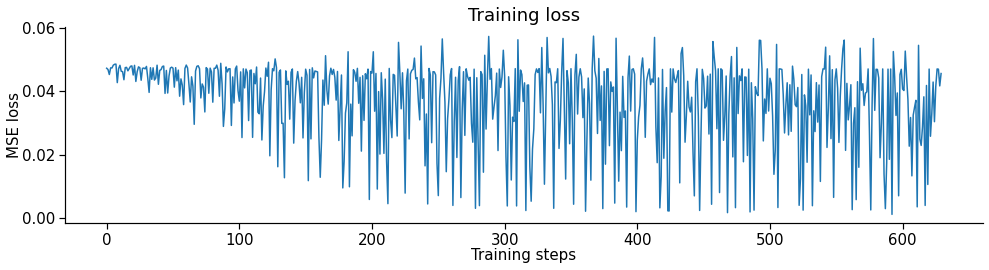

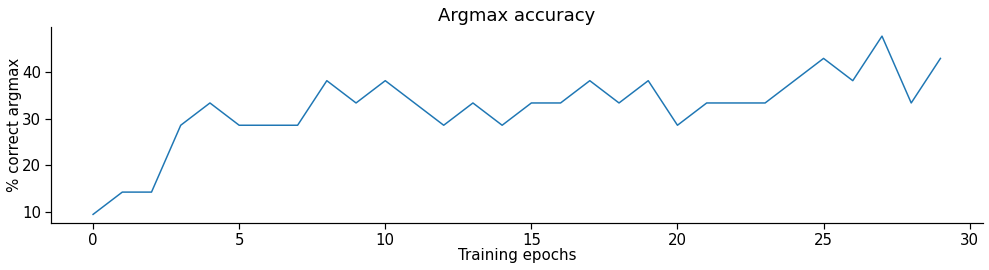

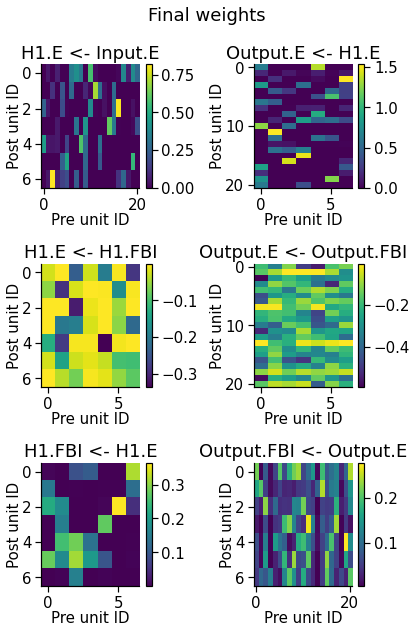

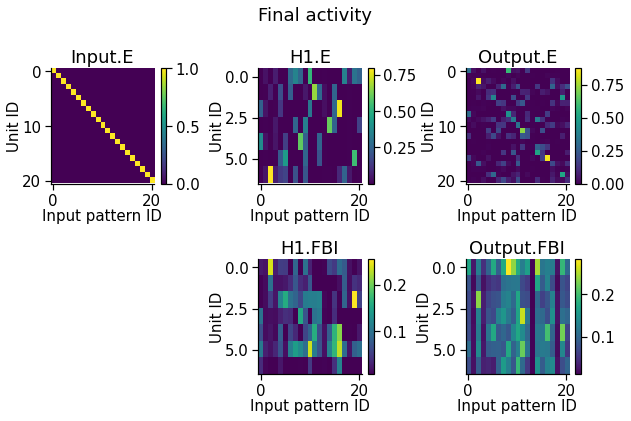

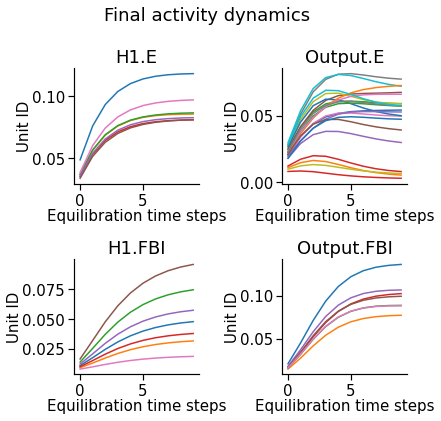

Final population biases:
H1 E Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0.])
H1 FBI Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0.])
Output E Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Output FBI Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0.])


In [8]:
network_config = ut.read_from_yaml('../optimize/data/20220915_EIANN_1_hidden_backprop_softplus_SGD_config.yaml')
pprint(network_config)

layer_config = network_config['layer_config']
projection_config = network_config['projection_config']
training_kwargs = network_config['training_kwargs']

bp_network = Network(layer_config, projection_config, seed=seed, **training_kwargs)

data_generator.manual_seed(data_seed)
ut.test_EIANN_config(bp_network, dataloader, epochs, supervised=False)

Pearson correlation: r=-0.05206266361305601, r^2=0.0027105209424862263, p=0.5311427847290823


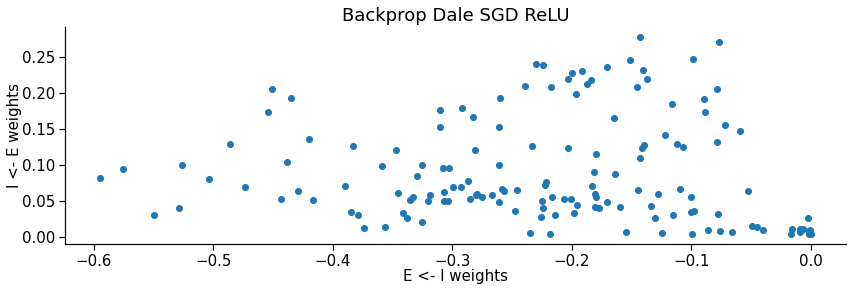

In [9]:
plt.figure()
E_I = bp_network.Output.E.Output.FBI.weight.detach().numpy().flatten()
I_E = bp_network.Output.FBI.Output.E.weight.detach().numpy().T.flatten()
plt.scatter(E_I, I_E)
plt.xlabel('E <- I weights')
plt.ylabel('I <- E weights')
plt.title('Backprop Dale SGD ReLU')
r, p = pearsonr(E_I, I_E)
print('Pearson correlation: r={}, r^2={}, p={}'.format(r,r**2,p))

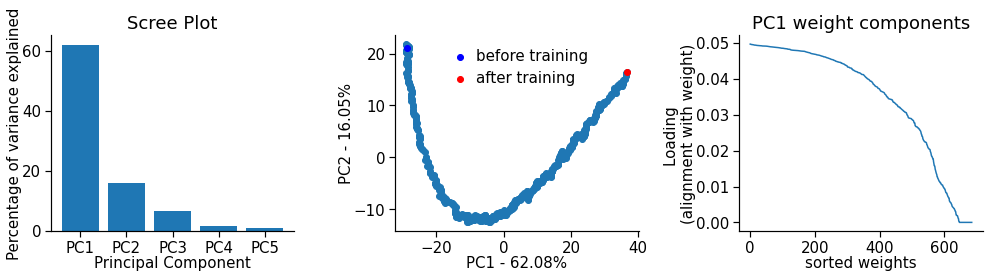

In [10]:
ep.plot_weight_history_PCs(bp_network)

  0%|          | 0/400 [00:00<?, ?it/s]/Users/ag1880/opt/anaconda3/lib/python3.8/site-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([1, 21])) that is different to the input size (torch.Size([21])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|██████████| 400/400 [00:11<00:00, 33.97it/s]


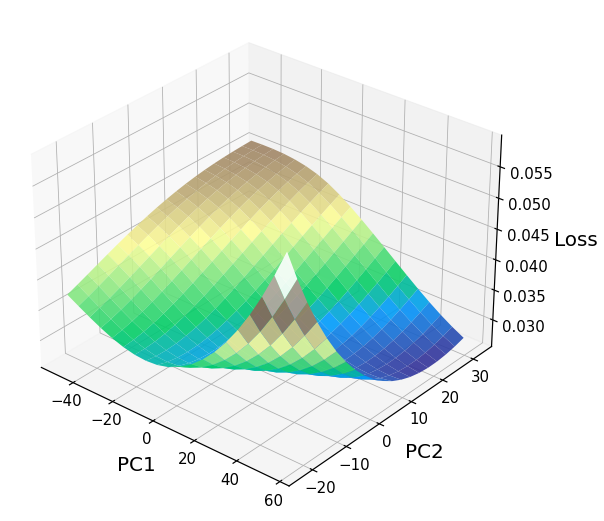

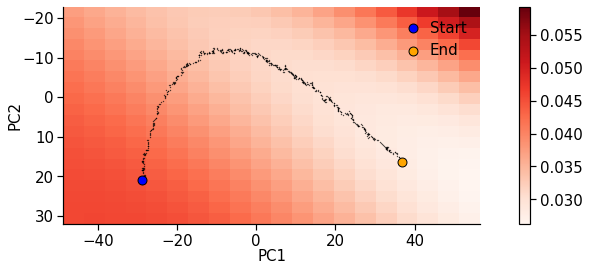

In [11]:
ds = [x for x in zip(dataset,target)]
test_dataloader = DataLoader(ds, batch_size=1)

ep.plot_loss_landscape(bp_network, test_dataloader, num_points=20)

In [12]:
# num_points = 30

# flat_weight_history_gjorg, weight_sizes = get_flat_weight_history(network)
# flat_weight_history_bp, weight_sizes = get_flat_weight_history(network_bp)

# flat_weight_history_combined = torch.cat([flat_weight_history_gjorg,flat_weight_history_bp])

In [13]:


# # Center the data (mean=0, std=1)
# w_mean = torch.mean(flat_weight_history, axis=0)
# w_std = torch.std(flat_weight_history, axis=0)
# centered_weight_history = (flat_weight_history - w_mean) / (w_std + 1e-10) # add epsilon to avoid NaNs

# # Get weights in gridplane defined by PC dimensions
# pca = PCA(n_components=2)
# pca.fit(centered_weight_history)
# weight_hist_pca_space = pca.transform(centered_weight_history)

# PC1 = weight_hist_pca_space[:, 0]
# PC2 = weight_hist_pca_space[:, 1]
# range_extension = 0.3 #proportion to sample further on each side of the grid
# PC1_extension = (np.max(PC1) - np.min(PC1)) * range_extension
# PC2_extension = (np.max(PC2) - np.min(PC2)) * range_extension
# PC1_range = np.linspace(np.min(PC1) - PC1_extension, np.max(PC1) + PC1_extension, num_points)
# PC2_range = np.linspace(np.min(PC2) - PC2_extension, np.max(PC2) + PC2_extension, num_points)
# PC1_mesh, PC2_mesh = np.meshgrid(PC1_range, PC2_range)

# # Convert PC coordinates into full weight vectors
# flat_PC1_vals = PC1_mesh.reshape(1, num_points**2)
# flat_PC2_vals = PC2_mesh.reshape(1, num_points**2)
# meshgrid_points = np.concatenate([flat_PC1_vals, flat_PC2_vals]).T

# gridpoints_weightspace = pca.inverse_transform(meshgrid_points)
# gridpoints_weightspace = torch.tensor(gridpoints_weightspace) * w_std + w_mean

# # Compute loss for points in grid
# losses = torch.zeros(num_points**2)
# for i,gridpoint_flat in enumerate(gridpoints_weightspace):
#     weight_mat_ls = unflatten_weights(gridpoint_flat, weight_sizes)
#     losses[i] = compute_loss(network, weight_mat_ls, test_dataloader)
# loss_grid = losses.reshape([PC1_range.size, PC2_range.size])

# plot_loss_surface(loss_grid, PC1_mesh, PC2_mesh)

# fig = plt.figure()
# im = plt.imshow(loss_grid, cmap='Reds',
#                 extent=[np.min(PC1_range), np.max(PC1_range),
#                         np.max(PC2_range), np.min(PC2_range)])
# plt.colorbar(im)
# plt.scatter(PC1, PC2, s=0.1, color='k')
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.show()